# Text-to-Speech Singlish

Text to Melspectrogram using Tacotron2 and FastSpeech2.

<div class="alert alert-info">

This tutorial is available as an IPython notebook at [malaya-speech/example/tts-singlish](https://github.com/huseinzol05/malaya-speech/tree/master/example/tts-singlish).
    
</div>

<div class="alert alert-warning">

This module is not language independent, so it not save to use on different languages. Pretrained models trained on hyperlocal languages.
    
</div>

<div class="alert alert-warning">

This is an application of malaya-speech Pipeline, read more about malaya-speech Pipeline at [malaya-speech/example/pipeline](https://github.com/huseinzol05/malaya-speech/tree/master/example/pipeline).
    
</div>

In [1]:
import malaya_speech
import numpy as np
from malaya_speech import Pipeline
import matplotlib.pyplot as plt
import IPython.display as ipd

### Tacotron2 description

1. Malaya-speech Tacotron2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.

### FastSpeech2 description

1. Malaya-speech FastSpeech2 will generate melspectrogram with feature size 80.
2. Use Malaya-speech vocoder to convert melspectrogram to waveform.
3. Cannot generate more than melspectrogram longer than 2000 timestamp, it will throw an error. Make sure the texts are not too long.

### List available Tacotron2

In [2]:
malaya_speech.tts.available_tacotron2()

INFO:root:`husein` and `haqkiem` combined loss from training set.


,Size (MB),Quantized Size (MB),Combined loss,understand punctuations
male,104,26.3,0.1733,False
female,104,26.3,0.1733,False
husein,104,26.3,0.1165,False
haqkiem,104,26.3,0.1375,True
female-singlish,104,26.3,0.0923,True


### List available FastSpeech2

In [3]:
malaya_speech.tts.available_fastspeech2()

INFO:root:`husein` and `haqkiem` combined loss from training set


,Size (MB),Quantized Size (MB),Combined loss,understand punctuations
male,125,31.7,1.846,False
male-v2,65.5,16.7,1.886,False
female,125,31.7,1.744,False
female-v2,65.5,16.7,1.804,False
husein,125,31.7,0.6411,False
husein-v2,65.5,16.7,0.7712,False
haqkiem,125,31.7,0.5663,True
female-singlish,125,31.7,0.5112,True


### Load Tacotron2 model

Read more about Tacotron2 model at https://malaya-speech.readthedocs.io/en/latest/tts-tacotron2-model.html

In [4]:
tacotron = malaya_speech.tts.tacotron2(model = 'female-singlish')
quantized_tacotron = malaya_speech.tts.tacotron2(model = 'female-singlish', quantized = True)

### Load FastSpeech2 model

Read more about FastSpeech2 model at https://malaya-speech.readthedocs.io/en/latest/tts-fastspeech2-model.html

In [5]:
fastspeech = malaya_speech.tts.fastspeech2(model = 'female-singlish')
quantized_fastspeech = malaya_speech.tts.fastspeech2(model = 'female-singlish', quantized = True)

### Predict Tacotron2

```python
def predict(self, string):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str

    Returns
    -------
    result: Dict[string, decoder-output, postnet-output, universal-output, alignment]
    """
```

It only able to predict 1 text for single feed-forward.

In [6]:
string1 = 'PETALING JAYA: Former prime minister Najib Razak has criticised the Inland Revenue Board’s (LHDN) move to serve him a bankruptcy notice, which his legal team had earlier called a political ploy.'

In [17]:
%%time

r = tacotron.predict(string1)

CPU times: user 3.22 s, sys: 117 ms, total: 3.34 s
Wall time: 2.74 s


In [18]:
%%time

quantized_r = quantized_tacotron.predict(string1)

CPU times: user 3.1 s, sys: 134 ms, total: 3.23 s
Wall time: 2.65 s


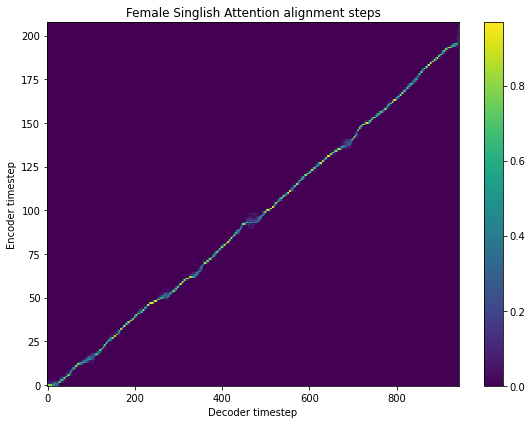

In [9]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    r['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

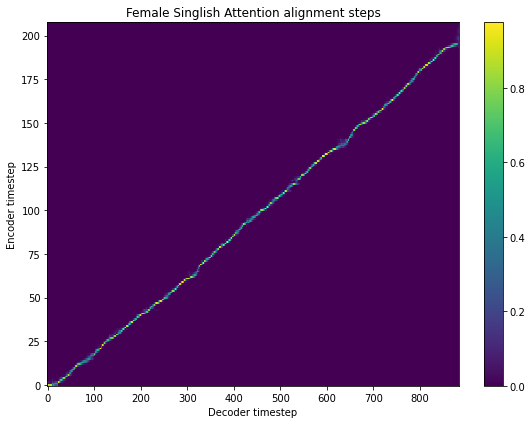

In [10]:
fig = plt.figure(figsize = (8, 6))
ax = fig.add_subplot(111)
ax.set_title('Female Singlish Attention alignment steps')
im = ax.imshow(
    quantized_r['alignment'],
    aspect='auto',
    origin='lower',
    interpolation='none')
fig.colorbar(im, ax=ax)
xlabel = 'Decoder timestep'
plt.xlabel(xlabel)
plt.ylabel('Encoder timestep')
plt.tight_layout()
plt.show()

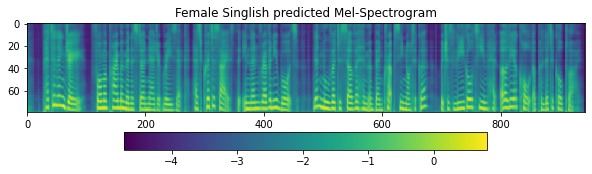

In [11]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

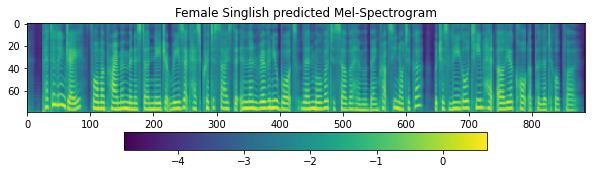

In [12]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(quantized_r['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Predict FastSpeech2

```python
def predict(
    self,
    string,
    speed_ratio: float = 1.0,
    f0_ratio: float = 1.0,
    energy_ratio: float = 1.0,
):
    """
    Change string to Mel.

    Parameters
    ----------
    string: str
    speed_ratio: float, optional (default=1.0)
        Increase this variable will increase time voice generated.
    f0_ratio: float, optional (default=1.0)
        Increase this variable will increase frequency, low frequency will generate more deeper voice.
    energy_ratio: float, optional (default=1.0)
        Increase this variable will increase loudness.

    Returns
    -------
    result: Dict[string, decoder-output, universal-output, postnet-output]
    """
```

It only able to predict 1 text for single feed-forward.

In [19]:
%%time

r_fastspeech = fastspeech.predict(string1)

CPU times: user 1.29 s, sys: 95.2 ms, total: 1.38 s
Wall time: 265 ms


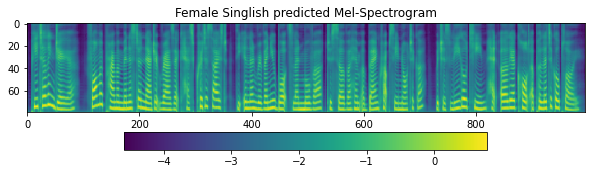

In [20]:
fig = plt.figure(figsize=(10, 8))
ax1 = fig.add_subplot(311)
ax1.set_title('Female Singlish predicted Mel-Spectrogram')
im = ax1.imshow(np.rot90(r_fastspeech['postnet-output']), aspect='auto', interpolation='none')
fig.colorbar(mappable=im, shrink=0.65, orientation='horizontal', ax=ax1)
plt.show()

### Load Vocoder model

There are 2 ways to synthesize melspectrogram output from TTS models,

1. If you are going to use individual speaker vocoder, make sure the speakers are the same If use female tacotron2, need to use female MelGAN also. Use `postnet-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-vocoder.html
2. If you are going to use universal MelGAN, use `universal-output` from TTS model. Read more at https://malaya-speech.readthedocs.io/en/latest/load-universal-melgan.html

We prefer individual speaker vocoder, size only 17MB and faster than universal vocoder.

In [14]:
vocoder = malaya_speech.vocoder.melgan(model = 'female-singlish')

In [15]:
y_ = vocoder(r['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [16]:
y_ = vocoder(quantized_r['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [21]:
y_ = vocoder(r_fastspeech['postnet-output'])
ipd.Audio(y_, rate = 22050)

### Predict Bahasa text

In [24]:
string = 'husein zolkepli sangatlah comel, ketiak wangi dan mempunyai baby yang comel. Husein juga suka mandi pada waktu pagi dan petang sambil menggunakan sabun lifeboy.'

In [25]:
%%time

r = tacotron.predict(string)

CPU times: user 3.05 s, sys: 115 ms, total: 3.16 s
Wall time: 2.6 s


In [26]:
%%time

quantized_r = quantized_tacotron.predict(string)

CPU times: user 2.97 s, sys: 145 ms, total: 3.11 s
Wall time: 2.57 s


In [27]:
%%time

r_fastspeech = fastspeech.predict(string)

CPU times: user 1.18 s, sys: 75 ms, total: 1.25 s
Wall time: 218 ms


In [28]:
y_ = vocoder(r['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [29]:
y_ = vocoder(quantized_r['postnet-output'])
ipd.Audio(y_, rate = 22050)

In [30]:
y_ = vocoder(r_fastspeech['postnet-output'])
ipd.Audio(y_, rate = 22050)